**Crash data analysis**
<a id='2_crash_data_analysis'></a>

- [Step 1. Import data](#import-data)
- [Step 2. Crash mapping](#crash-mapping)
- [Step 3. Crash statistics description](#crash-statistics-description)
    - [(1) Time and trend](#time-and-trend)
    - [(2) Collision type](#collision-type)  
    - [(3) Crash severity](#crash-severity)
- [Step 4. Countributing factor analysis](#contributing-factors-analysis) 

In [1]:
# Import libraries
import src
import glob
import numpy as np
import pandas as pd
import fiona
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point,LineString, MultiPoint,Polygon

# Step 1: Import data

<a id='import-data'></a>
[[back to top](#2_crash_data_analysis)]

<mark>User input: Save the geopackage file in the **source_data** folder </mark>

In [2]:
# Import the geopackage file
Crashfile = glob.glob( "./source_data/*.gpkg")
# Check the layers in the geopackage file
for layername in fiona.listlayers(Crashfile[0]):
    print(layername)

DemoIntersection


<mark>User input: Select the layer to be analyzed</mark>

In [3]:
layer_name = 'DemoIntersection'

In [4]:
SiteCrashes = gpd.read_file(Crashfile[0],layer=layer_name)

<mark>User input: Type the name of the location to be analyzed</mark>

The location name will show on the figures of the crash analysis results.

In [5]:
LocationName = 'Demo intersection'

<mark>User input: The start year and end year of the analysis</mark>

In [6]:
start_year = 2014

In [7]:
end_year = 2018

Data preprocessing and default settings:

In [8]:
if SiteCrashes.crashyear.max()<2000:#change the year index, 14->2014, 15->2015,...
    SiteCrashes.crashyear = SiteCrashes['crashyear']+2000

In [9]:
severity_color_dict = {'Fatal Crash':'black','A Injury Crash':'red','B Injury Crash':'orange', 'C Injury Crash':'green', 'No Injuries':'#4f94d4'}
time_sorter_dict = {'crashyear': np.arange(start_year,end_year+1), 
                    'crashmonth': np.arange(1,13), 
                    'dayofweekc': np.arange(1,8),
                   'crashhour': np.arange(0,25)}
time_label_dict = {'crashyear': 'Year', 
                    'crashmonth': 'Month', 
                    'dayofweekc': 'Day of week',
                   'crashhour': 'Hour'}
time_xticklabel_dict = {'crashyear': np.arange(start_year,end_year+1), 
                    'crashmonth': ['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'], 
                    'dayofweekc': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                   'crashhour': np.arange(0,25)}

# Step 2: Crash mapping
<a id='crash-mapping'></a>
[[back to top](#2_crash_data_analysis)]

In [ ]:
# Visualize crashes on map
src.crash_severity_mapping(SiteCrashes)

# Step 3: Crash statistics description
<a id='crash-statistics-description'></a>
[[back to top](#2_crash_data_analysis)]

<mark>All the figures and tables saved in **Analysis_results** folder</mark>

## (1) Time and trend
<a id='time-and-trend'></a>
[[back to top](#2_crash_data_analysis)]

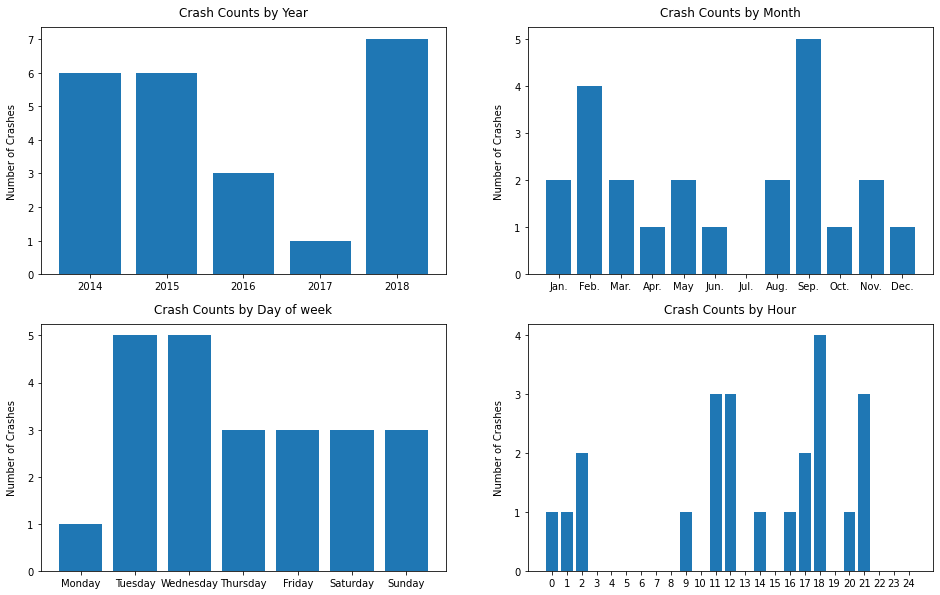

In [10]:
src.plot_counts_by_time_statistics(2014,2018,SiteCrashes)

## (2) Collision type
<a id='collision-type'></a>
[[back to top](#2_crash_data_analysis)]

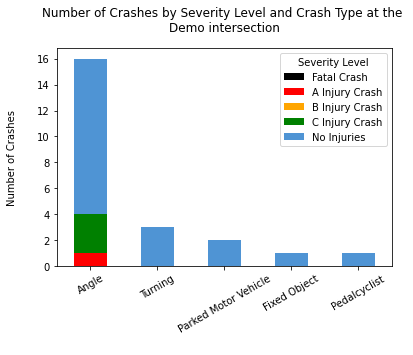

In [11]:
#src.counts_by_type('typeoffirs',LocationName,start_year,end_year,SiteCrashes)
src.counts_by_type_severity('crashinjur','typeoffirs',LocationName,start_year,end_year,SiteCrashes)

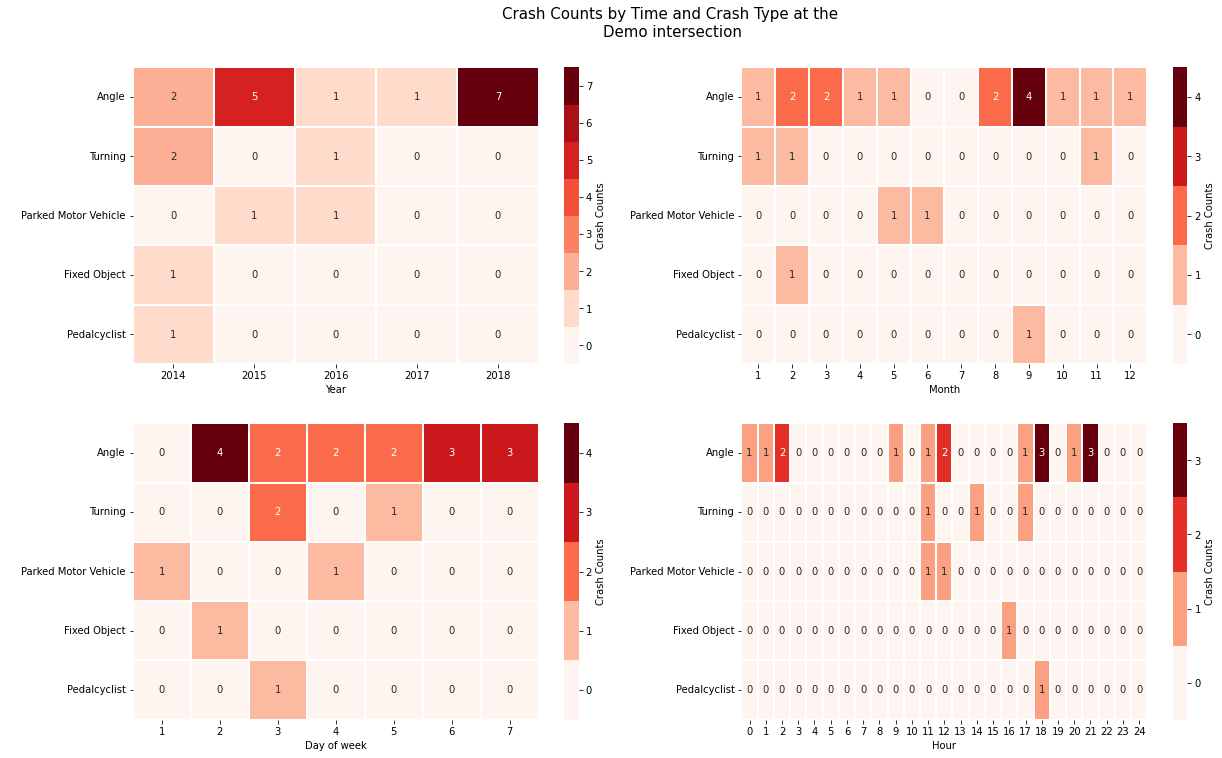

In [13]:
# src.plot_type_time_statistics('typeoffirs',LocationName,start_year,end_year,SiteCrashes)
src.plot_time_type_statistics('typeoffirs',LocationName,start_year,end_year,SiteCrashes)

## (3) Crash Severity
<a id='crash-severity'></a>
[[back to top](#2_crash_data_analysis)]

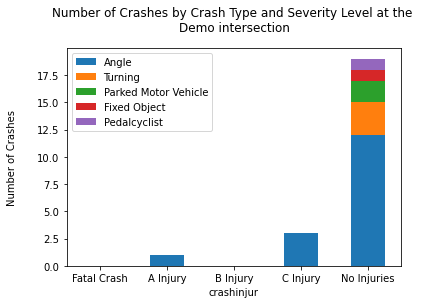

In [14]:
# src.counts_by_severity('crashinjur',LocationName,start_year,end_year,SiteCrashes)
src.counts_by_severity_type('crashinjur','typeoffirs',LocationName,start_year,end_year,SiteCrashes)

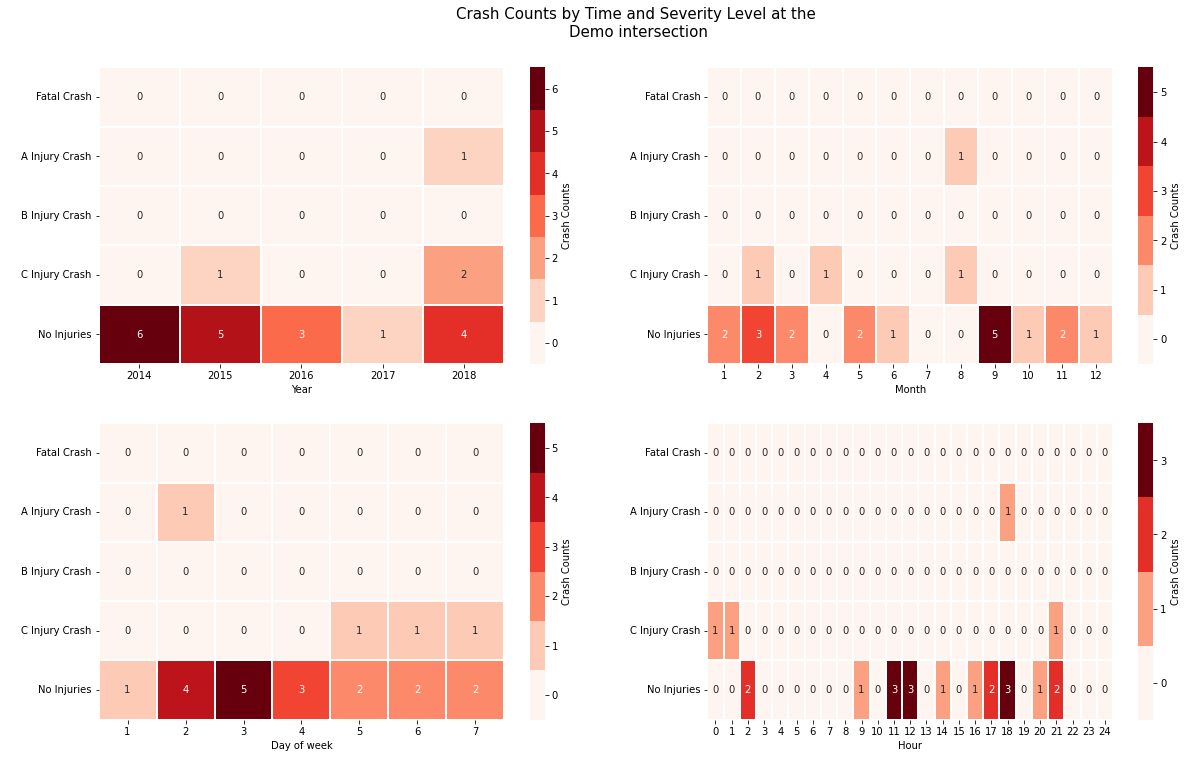

In [15]:
src.plot_time_severity_statistics('crashinjur',LocationName,start_year,end_year,SiteCrashes)

# Step 4: Contributing factors analysis
<a id='contributing-factors-analysis'></a>
[[back to top](#2_crash_data_analysis)]

In [16]:
# Crash Type, Severity Level, and Causes
pd.crosstab([SiteCrashes['typeoffirs'],SiteCrashes['crashinjur']],SiteCrashes['cause1'])

cause1                               (N/A)  Disregarding Stop Sign  \
typeoffirs           crashinjur                                      
Angle                A Injury Crash      0                       0   
                     C Injury Crash      1                       0   
                     No Injuries         0                       1   
Fixed Object         No Injuries         0                       0   
Parked Motor Vehicle No Injuries         0                       0   
Pedalcyclist         No Injuries         0                       0   
Turning              No Injuries         0                       0   

cause1                               Driving Skills/Knowledge/Experience  \
typeoffirs           crashinjur                                            
Angle                A Injury Crash                                    0   
                     C Injury Crash                                    0   
                     No Injuries                                       1   
Fixed Object         No Injuries                                       0   
Parked Motor Vehicle No Injuries                                       0   
Pedalcyclist         No Injuries                                       0   
Turning              No Injuries                                       0   

cause1                               Exceeding Safe Speed For Conditions  \
typeoffirs           crashinjur                                            
Angle                A Injury Crash                                    0   
                     C Injury Crash                                    0   
                     No Injuries                                       0   
Fixed Object         No Injuries                                       1   
Parked Motor Vehicle No Injuries                                       0   
Pedalcyclist         No Injuries                                       0   
Turning              No Injuries                                       0   

cause1                               Failing to Reduce Speed to Avoid Crash  \
typeoffirs           crashinjur                                               
Angle                A Injury Crash                                       0   
                     C Injury Crash                                       0   
                     No Injuries                                          1   
Fixed Object         No Injuries                                          0   
Parked Motor Vehicle No Injuries                                          0   
Pedalcyclist         No Injuries                                          0   
Turning              No Injuries                                          0   

cause1                               Failing to Yield Right of Way  \
typeoffirs           crashinjur                                      
Angle                A Injury Crash                              1   
                     C Injury Crash                              1   
                     No Injuries                                 8   
Fixed Object         No Injuries                                 0   
Parked Motor Vehicle No Injuries                                 0   
Pedalcyclist         No Injuries                                 1   
Turning              No Injuries                                 2   

cause1                               Improper Turning/No Signal  NA  \
typeoffirs           crashinjur                                       
Angle                A Injury Crash                           0   0   
                     C Injury Crash                           0   0   
                     No Injuries                              0   0   
Fixed Object         No Injuries                              0   0   
Parked Motor Vehicle No Injuries                              1   1   
Pedalcyclist         No Injuries                              0   0   
Turning              No Injuries                              1   0   

cause1          

- Roadway engineering factors
     - Curvature
     - Lane width
     - Pavement conditions
     - Roadside hazards
- Operation factors
     - Traffic signals/Traffic signs
     - Pavement markings
- Environment conditions
     - Weather -> pavement conditions
- Human factors